In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

# risk_measures = ['Variance',
#                  'ES q=0.05', 'ES q=0.01',
#                  'VaR q=0.05', 'VaR q=0.01', 
#                  'ERM k=10', 'CH']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10']

risk_measures_names = ['Variance',
                 'ES 95%', 'ES 99%',
                 'VaR 95%', 'VaR 99%', 
                 'ERM k=10']



order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['bitcoin', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

new_coin_names = ['CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ADA', 'ETH', 'LTC', 'XRP']

In [2]:
i = 1
rn = order[i]
path = '../../results/%s/MM/OHR_NIG.csv'%rn
_df = pd.read_csv(path)
list(np.unique(_df.copula))

copula = ['Clayton',
 'Frank',
 'Gauss Mix Indep',
 'Gaussian',
 'Gumbel',
 'NIG',
 'Plackett',
 'rotGumbel',
 't_Copula']


copula_names = [ 'Clayton',
 'Frank',
 'Gauss Mix Indep',
 'Gaussian',
 'Gumbel',
 'NIG',
 'Plackett',
 'rotGumbel',
 r'$t$-Copula']

In [3]:
start = []
for n in range(len(order)):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    
    start.append(np.min(df.Date))
    
start = np.max(start)

In [4]:
result_df = pd.DataFrame(np.zeros((len(copula), len(risk_measures))))

result_df.index = copula
result_df.columns = risk_measures

result_df

,Variance,ES q=0.05,ES q=0.01,VaR q=0.05,VaR q=0.01,ERM k=10
Clayton,0.0,0.0,0.0,0.0,0.0,0.0
Frank,0.0,0.0,0.0,0.0,0.0,0.0
Gauss Mix Indep,0.0,0.0,0.0,0.0,0.0,0.0
Gaussian,0.0,0.0,0.0,0.0,0.0,0.0
Gumbel,0.0,0.0,0.0,0.0,0.0,0.0
NIG,0.0,0.0,0.0,0.0,0.0,0.0
Plackett,0.0,0.0,0.0,0.0,0.0,0.0
rotGumbel,0.0,0.0,0.0,0.0,0.0,0.0
t_Copula,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Log return version <- stop using
# for i in range(len(order)):
#     rn = order[i]
#     print(rn)

#     path = '../../results/%s/MM/OHR_NIG.csv'%rn
#     df = pd.read_csv(path)

#     for C_name in copula:
#         for rm_name in risk_measures:
#             C_id = df.copula == C_name
#             R_id = df.loc[:,'risk measure'] == rm_name

#             _df = df.loc[C_id&R_id,:]

#             rh_arr = []
#             for l in range(len(_df)):
#                 row = _df.iloc[l,:]
#                 f = row.file
#                 h = row.OHR

#                 test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
#                 rs = test.loc[:, 'log return '+coin_names[i]]
#                 rf = test.loc[:, 'log return future']

#                 rh = list(rs-h*rf)
#                 rh_arr+=rh
#             result_df.loc[C_name, rm_name] =  np.mean(np.array(rh_arr)**2)
#             result_df.to_csv('MM_MSE_%s.csv'%rn)     

# Return version <- in use
for i in range(len(order)):
    rn = order[i]
    print(rn)

    path = '../../results/%s/MM/OHR_NIG.csv'%rn
    df = pd.read_csv(path)

    for C_name in copula:
        for rm_name in risk_measures:
            C_id = df.copula == C_name
            R_id = df.loc[:,'risk measure'] == rm_name

            _df = df.loc[C_id&R_id,:]

            Rh_arr = []
            for l in range(len(_df)):
                row = _df.iloc[l,:]
                f = row.file
                h = row.OHR

                test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
                
                if np.mean(pd.to_datetime(test.Date) >= start):
                    Rs = np.exp(test.loc[:, 'log return '+coin_names[i]])-1
                    Rf = np.exp(test.loc[:, 'log return future'])-1

                    Rh = list(Rs-h*Rf)
                    Rh_arr+=Rh
            result_df.loc[C_name, rm_name] =  np.mean(np.array(Rh_arr)**2)
            result_df.to_csv('Rh_MM_MSE_%s.csv'%rn)     

BBT_Tiingo
BBT_future_CRIX
BBT_future_BITX
BBT_future_BITW100
BBT_future_BITW20
BBT_future_BITW70
BBT_future_Tiingo_ada
BBT_future_Tiingo_eth
BBT_future_Tiingo_ltc
BBT_future_Tiingo_xrp


In [6]:
# Log return version <- stop using
# for i in range(len(order)):
#     rn = order[i]
#     print(rn)

#     path = '../../results/%s/MM/OHR_NIG.csv'%rn
#     df = pd.read_csv(path)

#     for C_name in copula:
#         for rm_name in risk_measures:
#             C_id = df.copula == C_name
#             R_id = df.loc[:,'risk measure'] == rm_name

#             _df = df.loc[C_id&R_id,:]

#             rh_arr = []
#             for l in range(len(_df)):
#                 row = _df.iloc[l,:]
#                 f = row.file
#                 h = row.OHR

#                 test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
#                 rs = test.loc[:, 'log return '+coin_names[i]]
#                 rf = test.loc[:, 'log return future']

#                 rh = list(rs-h*rf)
#                 rh_arr+=rh
#             rh_arr = np.array(rh_arr)  
            
#             semiVariance = np.mean((rh_arr[rh_arr<=np.mean(rh_arr)])**2)
            
#             result_df.loc[C_name, rm_name] =  semiVariance

#             result_df.to_csv('MM_semiVariance_%s.csv'%rn)     
           
    
# Return version <- in use
for i in range(len(order)):
    rn = order[i]
    print(rn)

    path = '../../results/%s/MM/OHR_NIG.csv'%rn
    df = pd.read_csv(path)

    for C_name in copula:
        for rm_name in risk_measures:
            C_id = df.copula == C_name
            R_id = df.loc[:,'risk measure'] == rm_name

            _df = df.loc[C_id&R_id,:]

            Rh_arr = []
            for l in range(len(_df)):
                row = _df.iloc[l,:]
                f = row.file
                h = row.OHR

                test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
                if np.mean(pd.to_datetime(test.Date) >= start):
                    Rs = np.exp(test.loc[:, 'log return '+coin_names[i]])-1
                    Rf = np.exp(test.loc[:, 'log return future'])-1

                    Rh = list(Rs-h*Rf)
                    Rh_arr+=Rh
                    
            Rh_arr = np.array(Rh_arr)  
            semiVariance = np.mean((Rh_arr[Rh_arr<=np.mean(Rh_arr)])**2)
            result_df.loc[C_name, rm_name] =  semiVariance
            result_df.to_csv('Rh_MM_semiVariance_%s.csv'%rn)     

BBT_Tiingo
BBT_future_CRIX
BBT_future_BITX
BBT_future_BITW100
BBT_future_BITW20
BBT_future_BITW70
BBT_future_Tiingo_ada
BBT_future_Tiingo_eth
BBT_future_Tiingo_ltc
BBT_future_Tiingo_xrp


In [7]:
Rh_arr

array([-1.90235325e-02,  5.05918279e-02,  4.29005082e-02, -1.58075759e-01,
       -5.75751911e-02, -3.57676607e-03, -1.90371696e-01,  4.80408067e-02,
        2.10635823e-01,  6.69236875e-02,  1.59667073e-02,  2.63674172e-03,
        4.41451851e-02,  6.72565312e-03, -2.10521381e-02, -3.70871860e-02,
       -7.01172944e-02, -3.54132878e-02, -1.49246298e-02, -4.73295104e-02,
        1.17408694e-01, -2.57688218e-02,  2.66603809e-03, -3.37756623e-02,
       -1.68754516e-02, -6.39904875e-04, -4.37109329e-02, -6.47661214e-02,
        5.02595515e-02, -1.61116135e-02, -1.09553063e-02, -4.63008428e-03,
       -1.34424996e-01,  1.04305887e-01,  1.31252953e-02,  8.83688038e-02,
       -2.45910774e-02, -1.73002365e-01,  7.90572451e-03,  1.21326479e-01,
        2.10381414e-02, -1.84247951e-01,  4.97281335e-01,  1.86044613e-03,
       -2.16261342e-02, -1.61020612e-02,  2.27192529e-02, -7.55057266e-03,
       -5.36182916e-02,  3.70743508e-02, -2.37463951e-03,  7.37593061e-02,
        2.91823884e-02, -

In [8]:
rn = order[6]
print(rn)

path = '../../results/%s/MM/OHR_NIG.csv'%rn
df = pd.read_csv(path)
for C_name in copula:
    for rm_name in risk_measures:
        C_id = df.copula == C_name
        R_id = df.loc[:,'risk measure'] == rm_name

        _df = df.loc[C_id&R_id,:]

        rh_arr = []
        for l in range(len(_df)):
            row = _df.iloc[l,:]
            f = row.file
            h = row.OHR

            test = pd.read_csv('../../processed_data/%s/test/%s'%(rn, f))
            rs = test.loc[:, 'log return '+coin_names[6]]
            rf = test.loc[:, 'log return future']

            rh = list(rs-h*rf)
            rh_arr+=rh

BBT_future_Tiingo_ada


In [9]:
rh_arr

[-0.030294241688534056,
 0.10939634529039918,
 0.00029273017815363567,
 -0.012812301845219656,
 -0.11273987464138817,
 0.08172952417925629,
 -0.1427385100969502,
 -0.01300777369148559,
 0.18900009543255247,
 -0.0067816109756497316,
 0.005093241768762447,
 0.001780971509313587,
 0.17646706472051,
 0.006659004456887991,
 -0.06206310043277681,
 0.02694176377927711,
 -0.0052455555552309435,
 -0.0016766863267763804,
 -0.020703416582256533,
 -0.028233725689134563,
 -0.021069652053143796,
 -0.0562563982037714,
 0.010585564568484071,
 0.04701316284614736,
 0.057542360814981985,
 0.06928601048843448,
 -0.13950099369930852,
 -0.036562054172797245,
 -0.0981871315647197,
 -0.021375512184576128,
 -0.06450620852796529,
 -0.04629319739327699,
 -0.05176551674719553,
 -0.02908796765060499,
 0.005189775985510705,
 -0.0004971906649606367,
 -0.0484729660201506,
 0.009957604309922458,
 0.046537111350483884,
 -0.015051821403245617,
 -0.08471887818341065,
 -0.09336184880865024,
 -0.0234698194919142,
 -0.0062

In [10]:
# vmin = 10000
# vmax =-10000

# for i in range(len(order)):
#     rn = order[i]
#     path = 'MM_MSE_%s.csv'%rn
#     df = pd.read_csv(path, index_col='Unnamed: 0')

#     vmin = np.min([vmin,np.min(np.min(df))])
#     vmax = np.max([vmax,np.max(np.max(df))])
    
# print(vmin, vmax)

In [11]:
order

['BBT_Tiingo',
 'BBT_future_CRIX',
 'BBT_future_BITX',
 'BBT_future_BITW100',
 'BBT_future_BITW20',
 'BBT_future_BITW70',
 'BBT_future_Tiingo_ada',
 'BBT_future_Tiingo_eth',
 'BBT_future_Tiingo_ltc',
 'BBT_future_Tiingo_xrp']

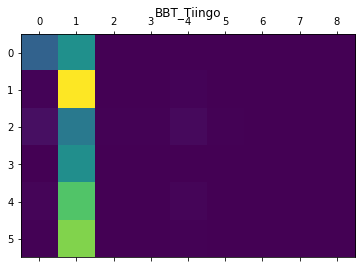

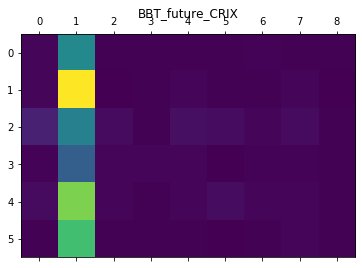

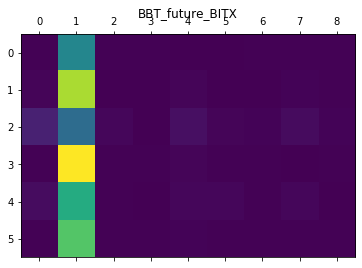

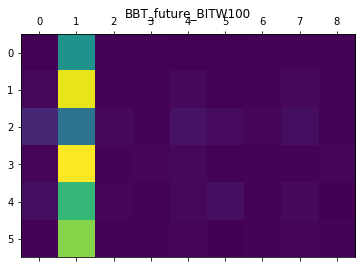

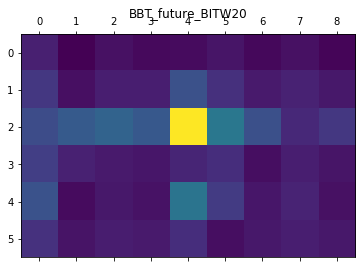

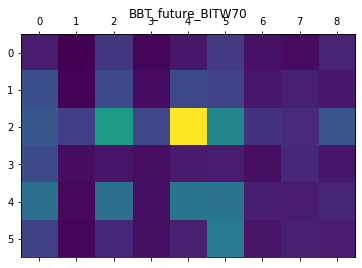

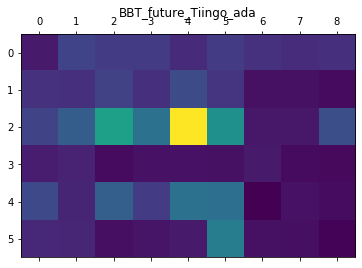

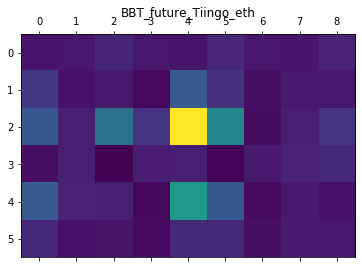

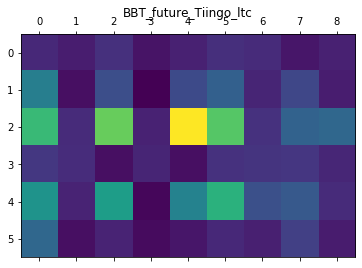

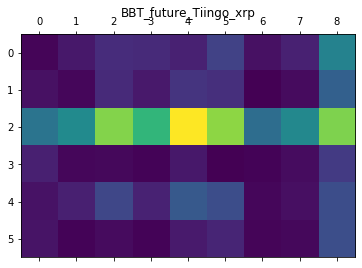

In [12]:
rn='BBT_future_BITW20'

for rn in order:
    path = 'Rh_MM_MSE_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    plt.matshow(df.T)
    plt.title(rn)

In [13]:
order

['BBT_Tiingo',
 'BBT_future_CRIX',
 'BBT_future_BITX',
 'BBT_future_BITW100',
 'BBT_future_BITW20',
 'BBT_future_BITW70',
 'BBT_future_Tiingo_ada',
 'BBT_future_Tiingo_eth',
 'BBT_future_Tiingo_ltc',
 'BBT_future_Tiingo_xrp']

BBT_future_CRIX
BBT_future_BITX
BBT_future_BITW100
BBT_future_BITW20
BBT_future_BITW70
BBT_future_Tiingo_ada
BBT_future_Tiingo_eth
BBT_future_Tiingo_ltc
BBT_future_Tiingo_xrp


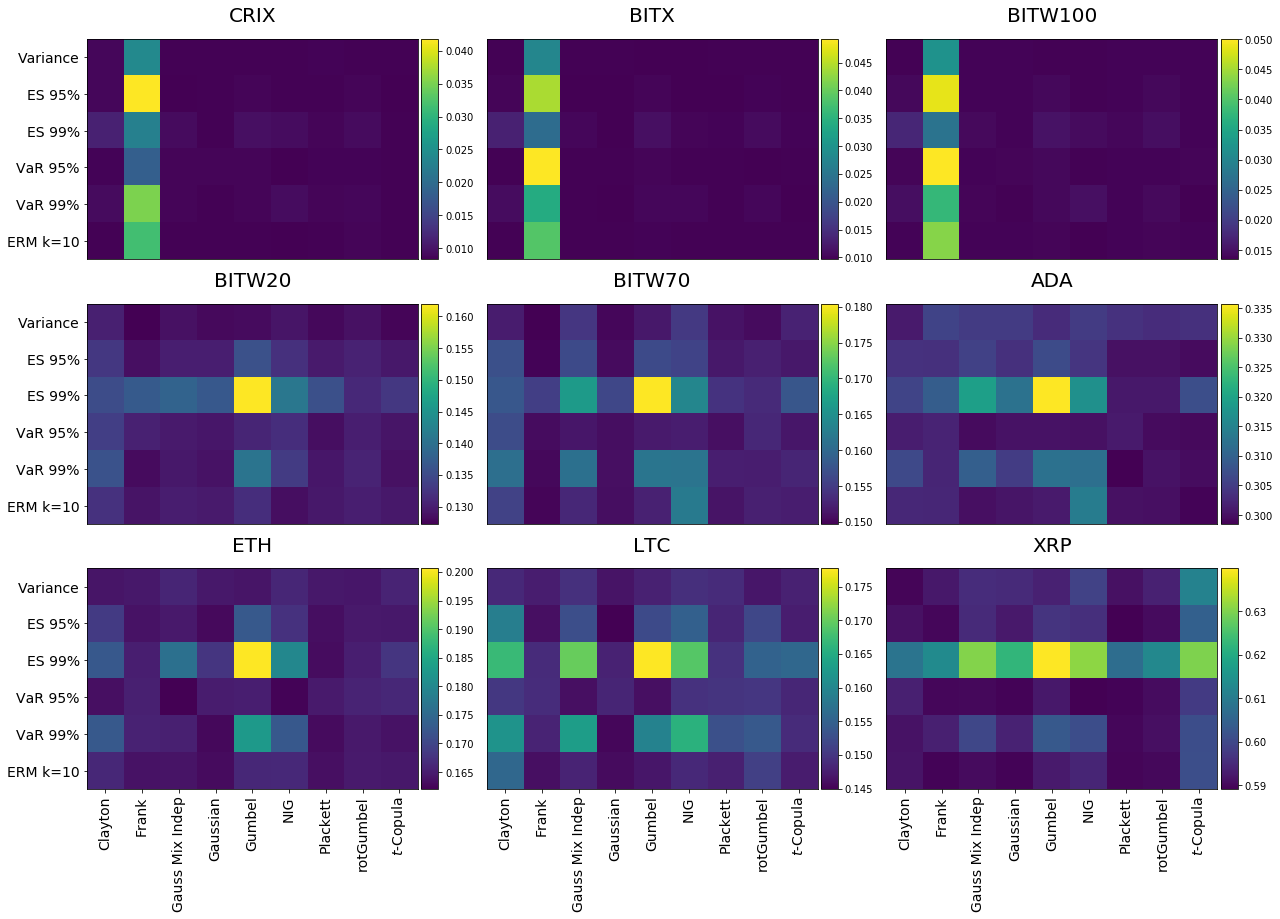

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

factor = 2.3
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=3, ncols=3)

for i, rn in enumerate(order[1:]):
    print(rn)
    path = 'Rh_MM_MSE_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    
    df *=100

    im = ax.flatten()[i].matshow(df.T, interpolation='nearest')

    divider = make_axes_locatable(ax.flatten()[i])

    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax.flatten()[i].set_title(new_coin_names[i], fontsize=20)
    ax.flatten()[i].xaxis.set_ticks_position('bottom')

    if i%3 == 0:
        ax.flatten()[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax.flatten()[i].set_yticks([])
    
    if i>=6:
        ax.flatten()[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax.flatten()[i].set_xticks([])

plt.subplots_adjust(wspace=.125, hspace=0.2)

plt.savefig('../../latex/_pics/MSE_other.pdf', transparent=True)

BBT_Tiingo


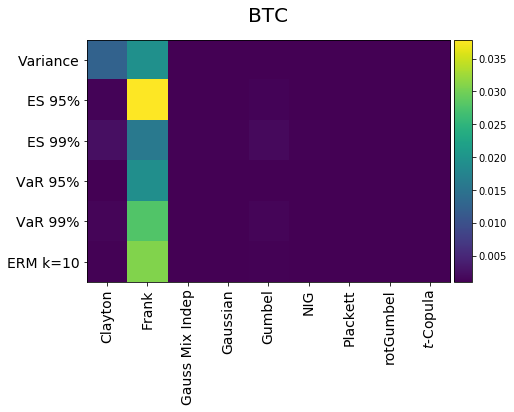

In [15]:
i=0
rn = order[i]
print(rn)
path = 'Rh_MM_MSE_%s.csv'%rn
df = pd.read_csv(path, index_col='Unnamed: 0')
df*=100

fig, ax = plt.subplots(figsize=(9*factor/3,6*factor/3), nrows=1, ncols=1)

im = ax.matshow(df.T, interpolation='nearest')
divider = make_axes_locatable(ax)

ax.set_yticklabels(['']+risk_measures_names, fontsize=14)
ax.set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
ax.xaxis.set_ticks_position('bottom')

cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

ax.set_title('BTC', fontsize=20)
plt.subplots_adjust(wspace=.125, hspace=0.2)

plt.savefig('../../latex/_pics/MSE_BTC.pdf', transparent=True, bbox_inches = "tight")

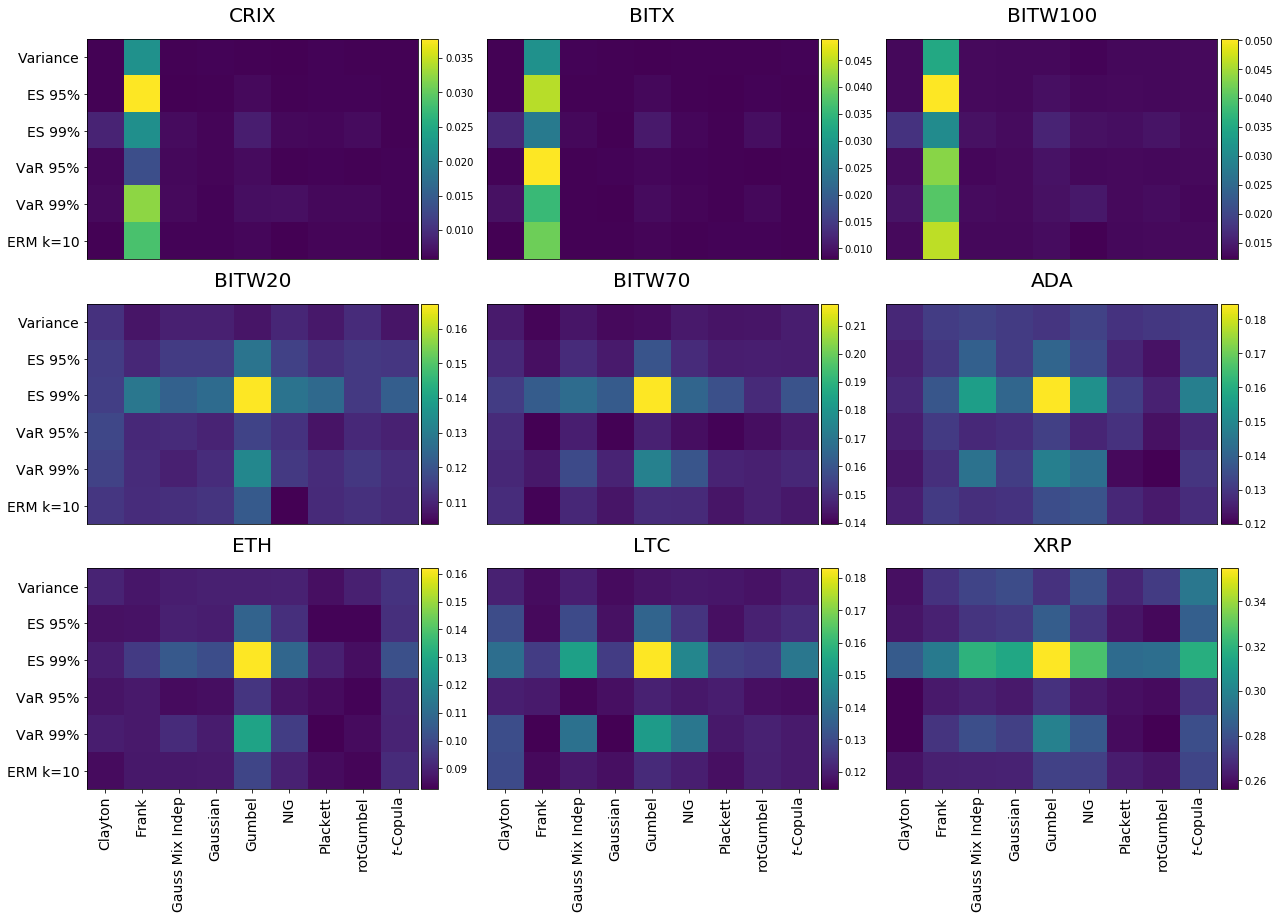

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

factor = 2.3
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=3, ncols=3)

for i, rn in enumerate(order[1:]):
    path = 'Rh_MM_semiVariance_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    
    df *=100

    im = ax.flatten()[i].matshow(df.T, interpolation='nearest')
    divider = make_axes_locatable(ax.flatten()[i])

    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax.flatten()[i].set_title(new_coin_names[i], fontsize=20)
    ax.flatten()[i].xaxis.set_ticks_position('bottom')

    if i%3 == 0:
        ax.flatten()[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax.flatten()[i].set_yticks([])
    
    if i>=6:
        ax.flatten()[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax.flatten()[i].set_xticks([])

plt.subplots_adjust(wspace=.125, hspace=0.2)
plt.savefig('../../latex/_pics/semiLowerVariance_other.pdf', transparent=True)

In [73]:
colorScales[0]

array([0.00286196, 0.07535692])

In [69]:
colorScales[0] * 1.5

array([0.01287882, 0.11303538])

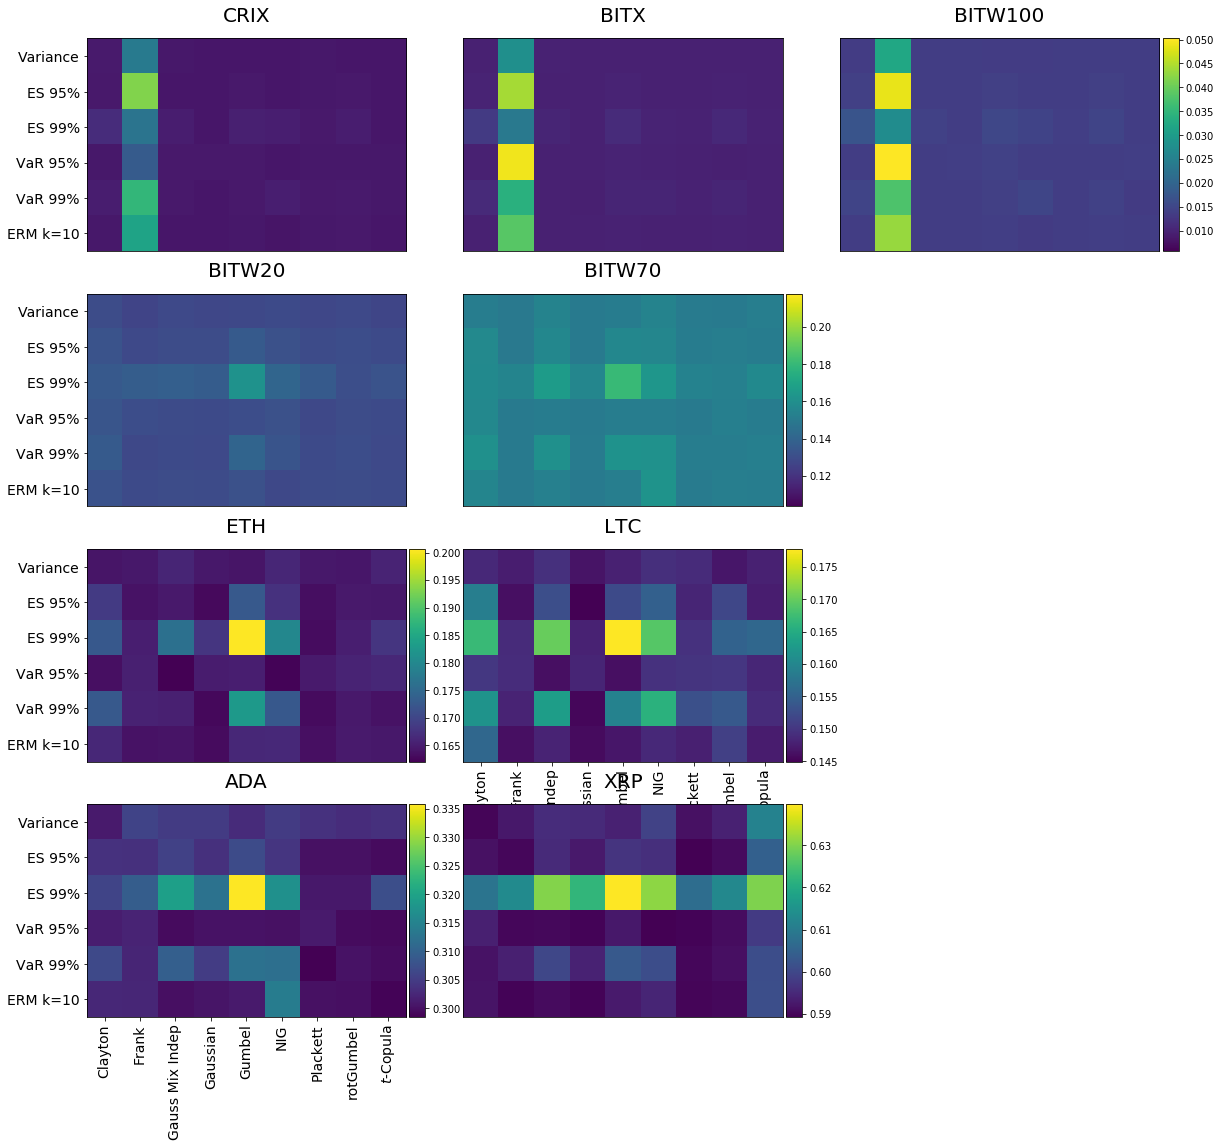

In [82]:
# group
row1 = ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100']
row2 = ['BBT_future_BITW20', 'BBT_future_BITW70']
row3 = ['BBT_future_Tiingo_eth','BBT_future_Tiingo_ltc']
row4 = ['BBT_future_Tiingo_ada', 'BBT_future_Tiingo_xrp']

new_coin_names_group = [['CRIX', 'BITX', 'BITW100'],
                        ['BITW20', 'BITW70'],
                        ['ETH', 'LTC'],
                        [ 'ADA','XRP']]

colorScales = []
row_arr = [row1, row2, row3, row4]

for i, row in enumerate(row_arr):
    _min = 100
    _max = -100
    for j, rn in enumerate(row):
        path = 'Rh_MM_semiVariance_%s.csv'%rn
        df = pd.read_csv(path, index_col='Unnamed: 0')
        df*=100
        
        _max = np.max([_max, np.max(np.max(df))])
        _min = np.min([_min, np.min(np.min(df))])
        
    colorScales.append(np.array([_min, _max]))

# for i, r in enumerate(colorScales):
#     colorScales[i][0] *= .75
#     colorScales[i][1] *= 1.25

factor = 3
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=4, ncols=3)

fig.delaxes(ax[1,2])
fig.delaxes(ax[2,2])
fig.delaxes(ax[3,2])

# fig.delaxes(ax[3,2])
    

for i, row in enumerate(row_arr):
    for j, rn in enumerate(row):
        path = 'Rh_MM_MSE_%s.csv'%rn
        df = pd.read_csv(path, index_col='Unnamed: 0')
        df *=100
        


        if (j == len(row_arr[i])-1 and (i in [0,1])):
            im = ax[i,j].matshow(df.T, interpolation='nearest', vmin=colorScales[i][0], vmax=colorScales[i][1]) 

            divider = make_axes_locatable(ax[i,j])
#         cbar.ax.tick_params(size=0)
            cax = divider.append_axes('right', size='5%', pad=0.05)
            cbar = fig.colorbar(im, cax=cax, orientation='vertical')
        
        elif (new_coin_names_group[i][j] in ['ETH', 'LTC', 'ADA', 'XRP']):
            im = ax[i,j].matshow(df.T, interpolation='nearest') 
            divider = make_axes_locatable(ax[i,j])
            cax = divider.append_axes('right', size='5%', pad=0.05)
            cbar = fig.colorbar(im, cax=cax, orientation='vertical')
            
        else:
            im = ax[i,j].matshow(df.T, interpolation='nearest', vmin=colorScales[i][0], vmax=colorScales[i][1]) 
            divider = make_axes_locatable(ax[i,j])
            cax = divider.append_axes('right', size='5%', pad=0.05)
            cbar = fig.colorbar(im, cax=cax, orientation='vertical', filled=False)
            cbar.set_ticks([])
            cbar.outline.set_visible(False)
#             cbar = fig.colorbar(im, ax=ax[i,j+1])

    
        ax[i,j].set_title(new_coin_names_group[i][j], fontsize=20)
        ax[i,j].xaxis.set_ticks_position('bottom')
        
        if j == 0:
            ax[i,j].set_yticklabels(['']+risk_measures_names, fontsize=14)
        else:
            ax[i,j].set_yticks([])
            
        if ((i==2) & (j==1)) or ((i==1) & (j in [2])) or ((i==3) & (j in [0])):
            ax[i,j].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
        else:
            ax[i,j].set_xticks([])

plt.subplots_adjust(wspace=-.5, hspace=0.2)
plt.savefig('../../latex/_pics/MSE_other_indice.pdf', transparent=True)

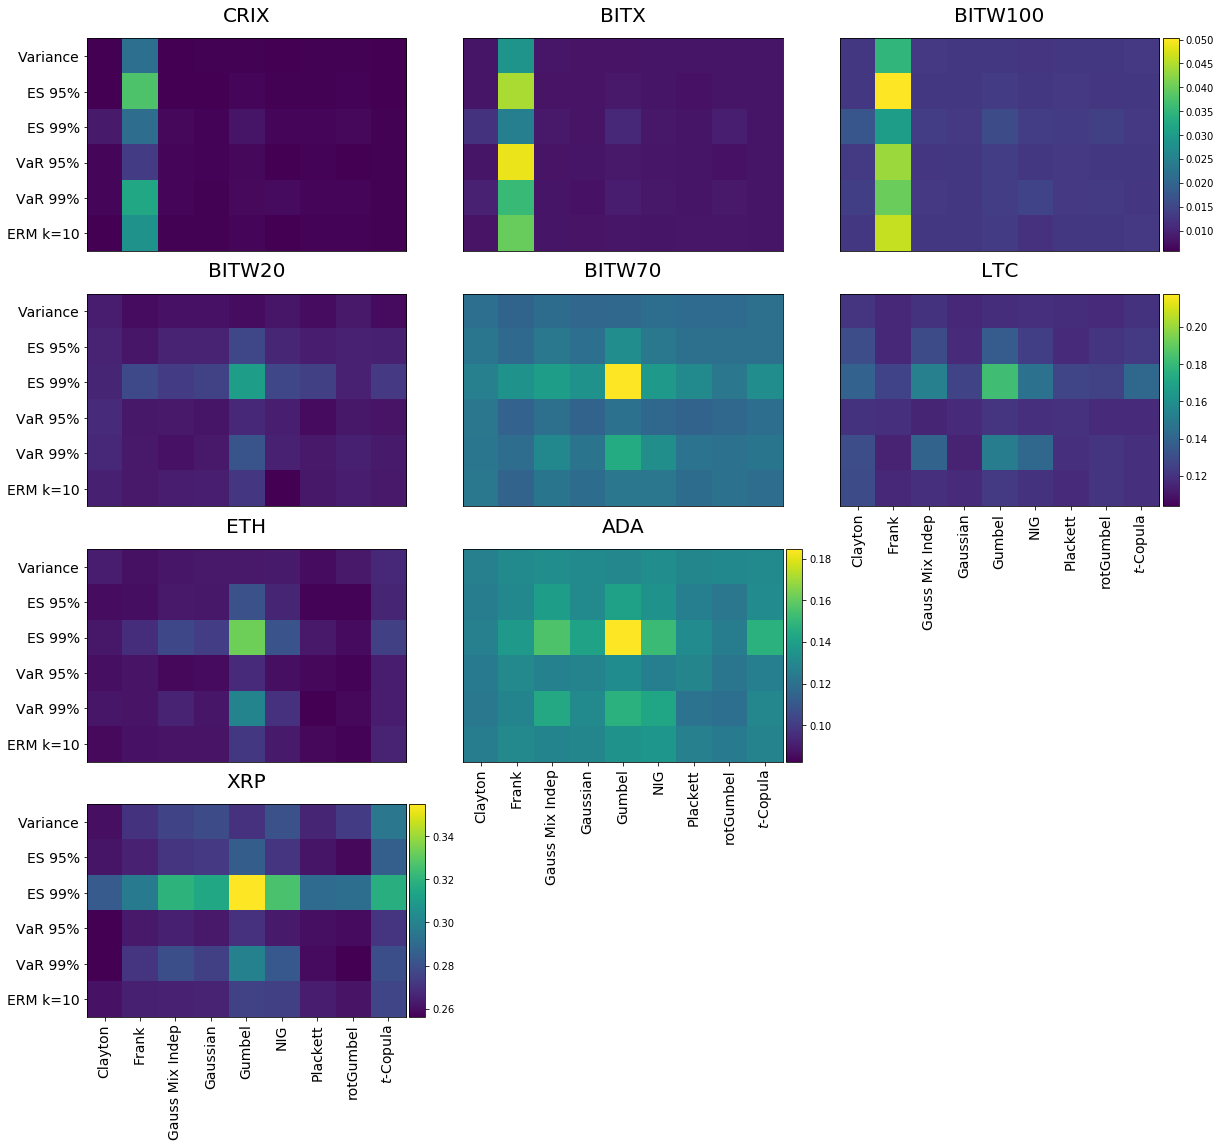

In [56]:
# group
row1 = ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100']
row2 = ['BBT_future_BITW20', 'BBT_future_BITW70','BBT_future_Tiingo_ltc']
row3 = ['BBT_future_Tiingo_eth','BBT_future_Tiingo_ada']
row4 = ['BBT_future_Tiingo_xrp']
new_coin_names_group = [['CRIX', 'BITX', 'BITW100'],
                        ['BITW20', 'BITW70', 'LTC'],
                        ['ETH', 'ADA'],['XRP']]

colorScales = []
row_arr = [row1, row2, row3, row4]

for i, row in enumerate(row_arr):
    _min = 100
    _max = -100
    for j, rn in enumerate(row):
        path = 'Rh_MM_semiVariance_%s.csv'%rn
        df = pd.read_csv(path, index_col='Unnamed: 0')
        df*=100
        
        _max = np.max([_max, np.max(np.max(df))])
        _min = np.min([_min, np.min(np.min(df))])
        
    colorScales.append((_min, _max))

factor = 3
fig, ax = plt.subplots(figsize=(9*factor,6*factor), nrows=4, ncols=3)

fig.delaxes(ax[2,2])
fig.delaxes(ax[3,1])
fig.delaxes(ax[3,2])


# fig.delaxes(ax[3,2])
    

for i, row in enumerate(row_arr):
    for j, rn in enumerate(row):
        path = 'Rh_MM_semiVariance_%s.csv'%rn
        df = pd.read_csv(path, index_col='Unnamed: 0')
        df *=100
        
        im = ax[i,j].matshow(df.T, interpolation='nearest', vmin=colorScales[i][0], vmax=colorScales[i][1]) 

        divider = make_axes_locatable(ax[i,j])
#         cbar.ax.tick_params(size=0)
        cax = divider.append_axes('right', size='5%', pad=0.05)

        if j == len(row_arr[i])-1:
            cbar = fig.colorbar(im, cax=cax, orientation='vertical')
            
        else:
            cbar = fig.colorbar(im, cax=cax, orientation='vertical', filled=False)
            cbar.set_ticks([])
            cbar.outline.set_visible(False)
#             cbar = fig.colorbar(im, ax=ax[i,j+1])

    
        ax[i,j].set_title(new_coin_names_group[i][j], fontsize=20)
        ax[i,j].xaxis.set_ticks_position('bottom')
        
        if j == 0:
            ax[i,j].set_yticklabels(['']+risk_measures_names, fontsize=14)
        else:
            ax[i,j].set_yticks([])
            
        if ((i==2) & (j==1)) or ((i==1) & (j in [2])) or ((i==3) & (j in [0])):
            ax[i,j].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
        else:
            ax[i,j].set_xticks([])

plt.subplots_adjust(wspace=-.5, hspace=0.2)
plt.savefig('../../latex/_pics/semiLowerVariance_other.pdf', transparent=True)

In [ ]:
j in [1,2,3,4]

In [ ]:
np.max(np.max(df))

In [150]:
rm_len = len(risk_measures)
c_len = len(copula_names)

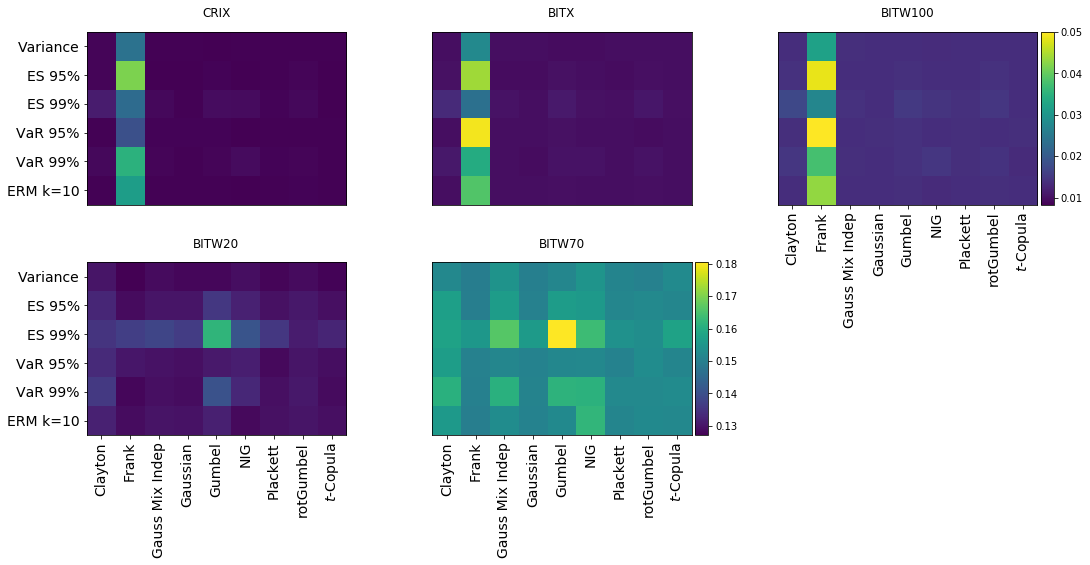

In [218]:
row1 = ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100']
row2 = ['BBT_future_BITW20', 'BBT_future_BITW70']
# row3 = ['BBT_future_Tiingo_eth','BBT_future_Tiingo_ltc']
# row4 = ['BBT_future_Tiingo_ada', 'BBT_future_Tiingo_xrp']

new_coin_names_group = [['CRIX', 'BITX', 'BITW100'],
                        ['BITW20', 'BITW70']]
#                         ['ETH', 'LTC'],
#                         [ 'ADA','XRP']]

colorScales = []
row_arr = [row1, row2]#, row3, row4]

for i, row in enumerate(row_arr):
    _min = 100
    _max = -100
    for j, rn in enumerate(row):
        path = 'Rh_MM_MSE_%s.csv'%rn
        df = pd.read_csv(path, index_col='Unnamed: 0')
        df*=100
        
        _max = np.max([_max, np.max(np.max(df))])
        _min = np.min([_min, np.min(np.min(df))])
        
    colorScales.append(np.array([_min, _max]))


fig = plt.figure()
factor = 0.1

ax1 = plt.axes([0, 
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

ax2 = plt.axes([(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1, 
                c_len*factor,
                rm_len*factor])

ax3 = plt.axes([2*(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

# row 2
ax4 = plt.axes([0,
                0,
                c_len*factor,
                rm_len*factor])

ax5 = plt.axes([(c_len*factor+factor)*0.8,
                0,
                c_len*factor,
                rm_len*factor])

ax_arr = [ax1,ax2,ax3,ax4,ax5]

indices =  ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100', 'BBT_future_BITW20', 'BBT_future_BITW70']
indice_names = ['CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70']


for i, rn in enumerate(indices):
    path = 'Rh_MM_MSE_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df *=100
    
    if i in [0,1,2]:
        im = ax_arr[i].matshow(df.T, vmin=colorScales[0][0], vmax=colorScales[0][1])
    else:
        im = ax_arr[i].matshow(df.T, vmin=colorScales[1][0], vmax=colorScales[1][1])

        
    ax_arr[i].set_title(indice_names[i])
    divider = make_axes_locatable(ax_arr[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)

    if i in [2,4]:
        cbar = fig.colorbar(im, cax=cax, orientation='vertical')

    else:
        cbar = fig.colorbar(im, cax=cax, orientation='vertical', filled=False)
        cbar.set_ticks([])
        cbar.outline.set_visible(False)
    
    if i in [0, 3]:
        ax_arr[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax_arr[i].set_yticks([])

    if i in [2,3,4]:
        ax_arr[i].xaxis.set_ticks_position('bottom')
        ax_arr[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax_arr[i].set_xticks([])
plt.savefig('../../latex/_pics/MSE_indices.png', transparent=True, bbox_inches='tight')

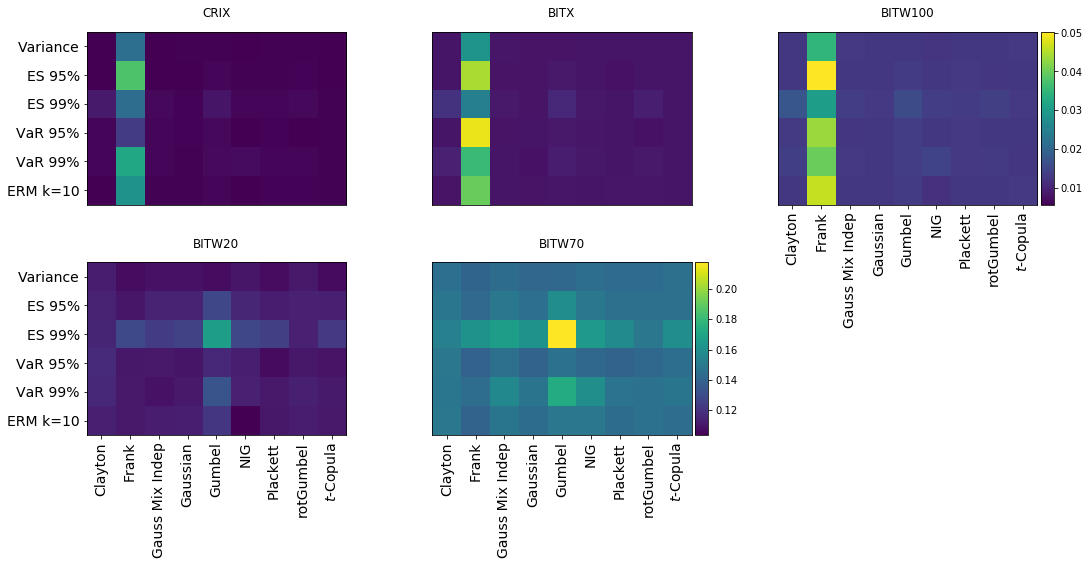

In [219]:
row1 = ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100']
row2 = ['BBT_future_BITW20', 'BBT_future_BITW70']
# row3 = ['BBT_future_Tiingo_eth','BBT_future_Tiingo_ltc']
# row4 = ['BBT_future_Tiingo_ada', 'BBT_future_Tiingo_xrp']

new_coin_names_group = [['CRIX', 'BITX', 'BITW100'],
                        ['BITW20', 'BITW70']]
#                         ['ETH', 'LTC'],
#                         [ 'ADA','XRP']]

colorScales = []
row_arr = [row1, row2]#, row3, row4]

for i, row in enumerate(row_arr):
    _min = 100
    _max = -100
    for j, rn in enumerate(row):
        path = 'Rh_MM_semiVariance_%s.csv'%rn
        df = pd.read_csv(path, index_col='Unnamed: 0')
        df*=100
        
        _max = np.max([_max, np.max(np.max(df))])
        _min = np.min([_min, np.min(np.min(df))])
        
    colorScales.append(np.array([_min, _max]))


fig = plt.figure()
factor = 0.1

ax1 = plt.axes([0, 
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

ax2 = plt.axes([(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1, 
                c_len*factor,
                rm_len*factor])

ax3 = plt.axes([2*(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

# row 2
ax4 = plt.axes([0,
                0,
                c_len*factor,
                rm_len*factor])

ax5 = plt.axes([(c_len*factor+factor)*0.8,
                0,
                c_len*factor,
                rm_len*factor])

ax_arr = [ax1,ax2,ax3,ax4,ax5]

indices =  ['BBT_future_CRIX', 'BBT_future_BITX', 'BBT_future_BITW100', 'BBT_future_BITW20', 'BBT_future_BITW70']
indice_names = ['CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70']


for i, rn in enumerate(indices):
    path = 'Rh_MM_semiVariance_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df *=100
    
    if i in [0,1,2]:
        im = ax_arr[i].matshow(df.T, vmin=colorScales[0][0], vmax=colorScales[0][1])
    else:
        im = ax_arr[i].matshow(df.T, vmin=colorScales[1][0], vmax=colorScales[1][1])

        
    ax_arr[i].set_title(indice_names[i])
    divider = make_axes_locatable(ax_arr[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)

    if i in [2,4]:
        cbar = fig.colorbar(im, cax=cax, orientation='vertical')

    else:
        cbar = fig.colorbar(im, cax=cax, orientation='vertical', filled=False)
        cbar.set_ticks([])
        cbar.outline.set_visible(False)
    
    if i in [0, 3]:
        ax_arr[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax_arr[i].set_yticks([])

    if i in [2,3,4]:
        ax_arr[i].xaxis.set_ticks_position('bottom')
        ax_arr[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax_arr[i].set_xticks([])
plt.savefig('../../latex/_pics/semiVariance_indices.png', transparent=True, bbox_inches='tight')

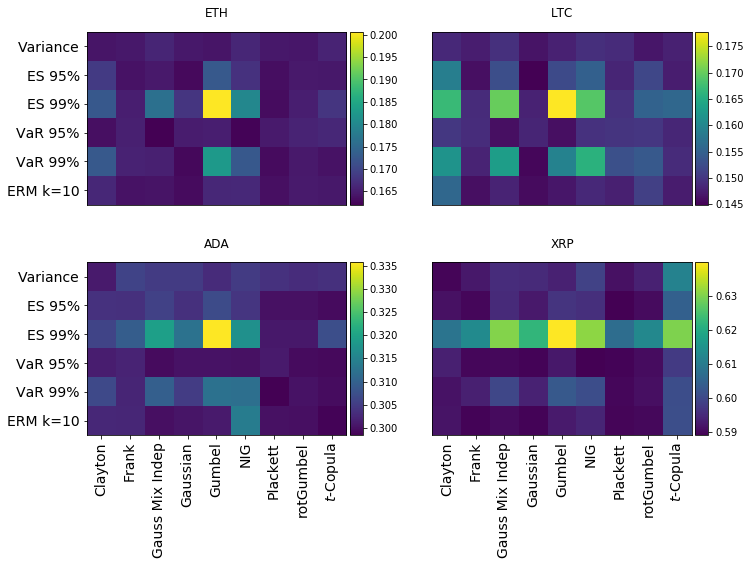

In [220]:
fig = plt.figure()
factor = 0.1

ax1 = plt.axes([0, 
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

ax2 = plt.axes([(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1, 
                c_len*factor,
                rm_len*factor])

# row 2
ax4 = plt.axes([0,
                0,
                c_len*factor,
                rm_len*factor])

ax5 = plt.axes([(c_len*factor+factor)*0.8,
                0,
                c_len*factor,
                rm_len*factor])

ax_arr = [ax1,ax2 ,ax4,ax5]

cryptos = ['BBT_future_Tiingo_eth','BBT_future_Tiingo_ltc', 'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_xrp']
crypto_names = ['ETH', 'LTC', 'ADA', 'XRP']


for i, rn in enumerate(cryptos):
    path = 'Rh_MM_MSE_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df *=100
#     ax_arr[i].matshow(df.T)
    
    im = ax_arr[i].matshow(df.T)
    ax_arr[i].set_title(crypto_names[i])

    divider = make_axes_locatable(ax_arr[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    
    if i in [0, 2]:
        ax_arr[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax_arr[i].set_yticks([])

    if i in [2,3]:
        ax_arr[i].xaxis.set_ticks_position('bottom')
        ax_arr[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax_arr[i].set_xticks([])
plt.savefig('../../latex/_pics/MSE_cryptos.png', transparent=True, bbox_inches='tight')

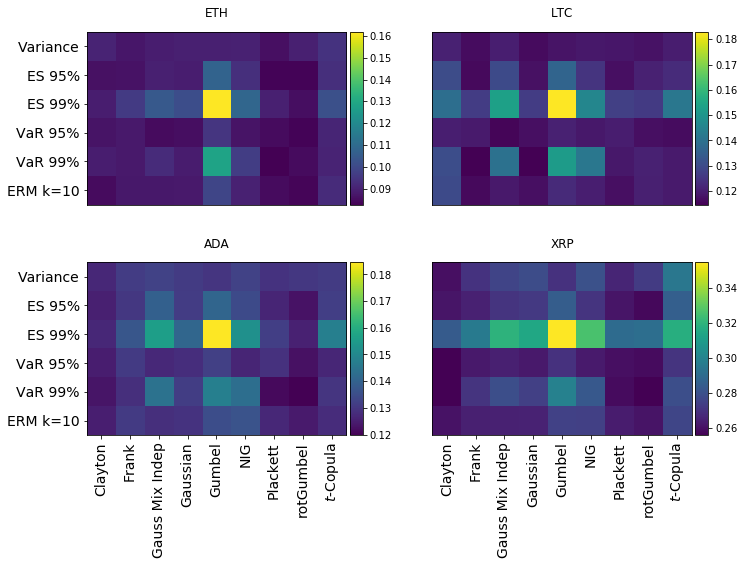

In [221]:
fig = plt.figure()
factor = 0.1

ax1 = plt.axes([0, 
                rm_len*factor+factor+0.1,
                c_len*factor,
                rm_len*factor])

ax2 = plt.axes([(c_len*factor+factor)*0.8,
                rm_len*factor+factor+0.1, 
                c_len*factor,
                rm_len*factor])

# row 2
ax4 = plt.axes([0,
                0,
                c_len*factor,
                rm_len*factor])

ax5 = plt.axes([(c_len*factor+factor)*0.8,
                0,
                c_len*factor,
                rm_len*factor])

ax_arr = [ax1,ax2 ,ax4,ax5]

cryptos = ['BBT_future_Tiingo_eth','BBT_future_Tiingo_ltc', 'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_xrp']
crypto_names = ['ETH', 'LTC', 'ADA', 'XRP']


for i, rn in enumerate(cryptos):
    path = 'Rh_MM_semiVariance_%s.csv'%rn
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df *=100
#     ax_arr[i].matshow(df.T)
    
    im = ax_arr[i].matshow(df.T)
    ax_arr[i].set_title(crypto_names[i])

    divider = make_axes_locatable(ax_arr[i])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    
    if i in [0, 2]:
        ax_arr[i].set_yticklabels(['']+risk_measures_names, fontsize=14)
    else:
        ax_arr[i].set_yticks([])

    if i in [2,3]:
        ax_arr[i].xaxis.set_ticks_position('bottom')
        ax_arr[i].set_xticklabels(['']+copula_names, fontsize=14, rotation=90)
    else:
        ax_arr[i].set_xticks([])
        
plt.savefig('../../latex/_pics/semiVariance_cryptos.png', transparent=True, bbox_inches='tight')